# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 602


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [84]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric&q="
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =f"{url}{city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | monmouth
Processing Record 2 of Set 1 | san antonio
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | nantucket
Processing Record 5 of Set 1 | grytviken
Processing Record 6 of Set 1 | blackmans bay
Processing Record 7 of Set 1 | margaret river
Processing Record 8 of Set 1 | constantia
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | calvinia
Processing Record 11 of Set 1 | dryden
Processing Record 12 of Set 1 | gizo
Processing Record 13 of Set 1 | saipan
Processing Record 14 of Set 1 | edinburgh of the seven seas
Processing Record 15 of Set 1 | queenstown
Processing Record 16 of Set 1 | ribeira grande
Processing Record 17 of Set 1 | novo aripuana
Processing Record 18 of Set 1 | kone
Processing Record 19 of Set 1 | hawaiian paradise park
Processing Record 20 of Set 1 | lebu
Processing Record 21 of Set 1 | tazovsky
Processing Record 22 of Set 1 

In [113]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data).rename(columns={"Lat":"Latitude","Lng":"Longitude",
                                                       "Max Temp":"Max Temperature (C)","Humidity":"Humidity (%)",
                                                       "Cloudiness":"Cloudiness (%)","Wind Speed":"Wind Speed (m/s)"})
# Show Record Count
city_data_df.count()


City                   576
Latitude               576
Longitude              576
Max Temperature (C)    576
Humidity (%)           576
Cloudiness (%)         576
Wind Speed (m/s)       576
Country                576
Date                   576
dtype: int64

In [114]:
# Display sample data
city_data_df.head()

,City,Latitude,Longitude,Max Temperature (C),Humidity (%),Cloudiness (%),Wind Speed (m/s),Country,Date
0,monmouth,40.3001,-74.1663,13.90,55,4,2.36,US,1698110996
1,san antonio,29.4241,-98.4936,26.86,75,75,7.72,US,1698110894
2,adamstown,-25.0660,-130.1015,22.78,81,100,4.99,PN,1698111183
3,nantucket,41.2835,-70.0995,13.03,77,100,1.54,US,1698110987
4,grytviken,-54.2811,-36.5092,-3.52,66,7,4.45,GS,1698111183


In [115]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [116]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Latitude,Longitude,Max Temperature (C),Humidity (%),Cloudiness (%),Wind Speed (m/s),Country,Date
City_ID,,,,,,,,,
0,monmouth,40.3001,-74.1663,13.90,55,4,2.36,US,1698110996
1,san antonio,29.4241,-98.4936,26.86,75,75,7.72,US,1698110894
2,adamstown,-25.0660,-130.1015,22.78,81,100,4.99,PN,1698111183
3,nantucket,41.2835,-70.0995,13.03,77,100,1.54,US,1698110987
4,grytviken,-54.2811,-36.5092,-3.52,66,7,4.45,GS,1698111183


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

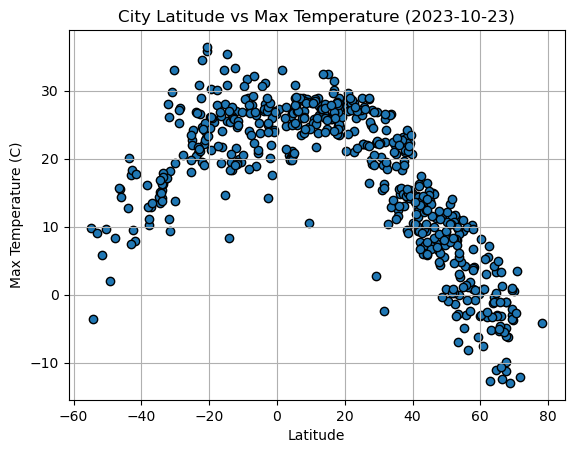

In [117]:
# Build scatter plot for latitude vs. temperature
x_val = city_data_df['Latitude']
y_val = city_data_df['Max Temperature (C)']
plt.scatter(x_val,y_val,edgecolors='black')
# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature (2023-10-23)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

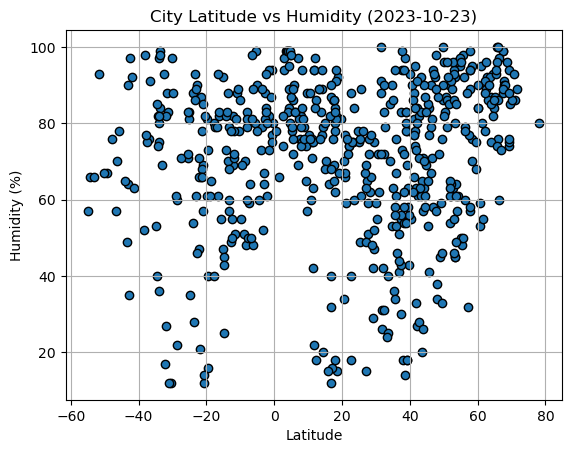

In [118]:
# Build the scatter plots for latitude vs. humidity
x_val2 = city_data_df['Latitude']
y_val2 = city_data_df['Humidity (%)']
plt.scatter(x_val2,y_val2,edgecolors='black')
# Incorporate the other graph properties
plt.title("City Latitude vs Humidity (2023-10-23)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

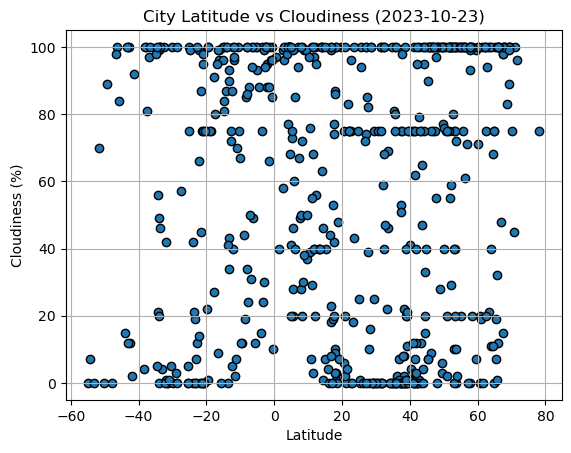

In [119]:
# Build the scatter plots for latitude vs. cloudiness
x_val3 = city_data_df['Latitude']
y_val3 = city_data_df['Cloudiness (%)']
plt.scatter(x_val3,y_val3,edgecolors='black')
# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness (2023-10-23)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

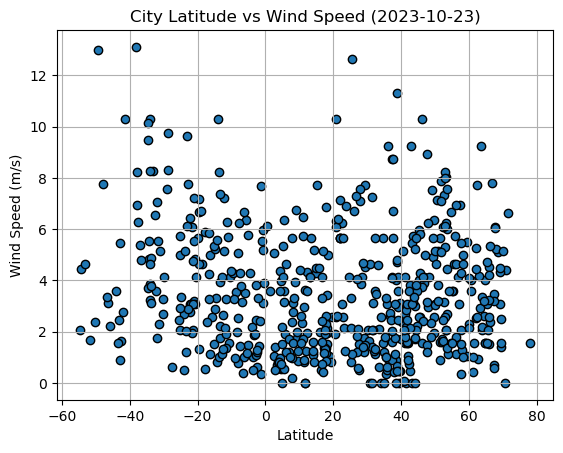

In [120]:
# Build the scatter plots for latitude vs. wind speed
x_val4 = city_data_df['Latitude']
y_val4 = city_data_df['Wind Speed (m/s)']
plt.scatter(x_val4,y_val4,edgecolors='black')
# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed (2023-10-23)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [160]:
# Define a function to create Linear Regression plots
def regression(x,y):
    slope, intercept, r_value, p_value, std_err = linregress(x,y)
    plt.scatter(x,y)
    x_line = np.arange(min(x),max(x),1)
    y_line = x_line*slope + intercept
    plt.plot(x_line,y_line,c='red')
    plt.xlabel(x.name)
    plt.ylabel(y.name)
    plt.annotate(f"y = {round(slope,2)}x + {round(intercept,2)}",xy=(x.mean(),y.mean()+8),c='red', fontsize= 14)
    return print(f"The r-value is {r_value}"),plt.show()

In [122]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Latitude']>=0]

# Display sample data
northern_hemi_df.head()

,City,Latitude,Longitude,Max Temperature (C),Humidity (%),Cloudiness (%),Wind Speed (m/s),Country,Date
City_ID,,,,,,,,,
0,monmouth,40.3001,-74.1663,13.90,55,4,2.36,US,1698110996
1,san antonio,29.4241,-98.4936,26.86,75,75,7.72,US,1698110894
3,nantucket,41.2835,-70.0995,13.03,77,100,1.54,US,1698110987
7,constantia,44.1833,28.6500,16.50,63,95,1.71,RO,1698111184
10,dryden,49.7833,-92.7503,9.16,100,100,2.57,CA,1698111184


In [123]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Latitude']<0]

# Display sample data
southern_hemi_df.head()

,City,Latitude,Longitude,Max Temperature (C),Humidity (%),Cloudiness (%),Wind Speed (m/s),Country,Date
City_ID,,,,,,,,,
2,adamstown,-25.0660,-130.1015,22.78,81,100,4.99,PN,1698111183
4,grytviken,-54.2811,-36.5092,-3.52,66,7,4.45,GS,1698111183
5,blackmans bay,-43.0167,147.3167,17.63,64,100,0.89,AU,1698111184
6,margaret river,-33.9500,115.0667,16.42,36,100,3.87,AU,1698111184
8,port-aux-francais,-49.3500,70.2167,2.09,67,89,12.99,TF,1698111184


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.8912954577442197


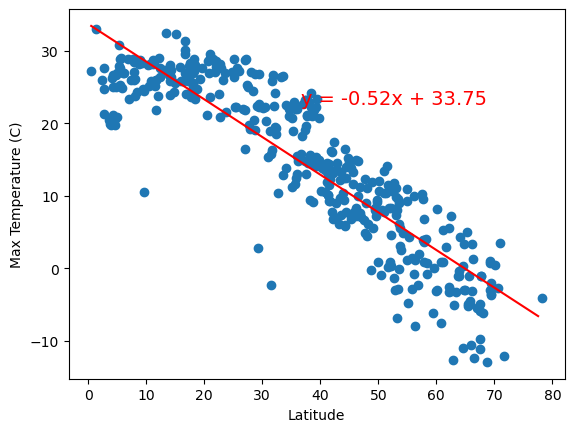

(None, None)

In [161]:
# Linear regression on Northern Hemisphere
regression(northern_hemi_df['Latitude'],northern_hemi_df['Max Temperature (C)'])

The r-value is 0.6502702301407484


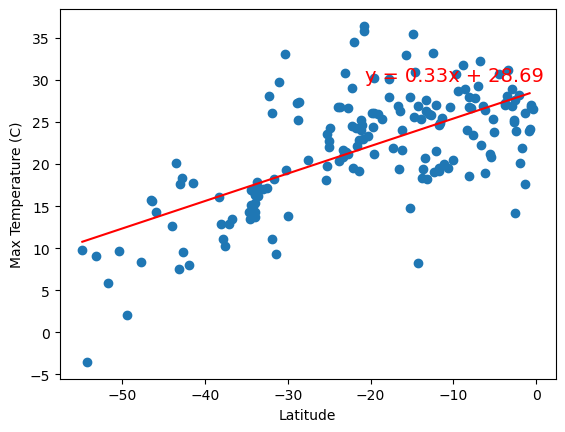

(None, None)

In [162]:
# Linear regression on Southern Hemisphere
regression(southern_hemi_df['Latitude'],southern_hemi_df['Max Temperature (C)'])

**Discussion about the linear relationship:** The correlation between temperature and latitude is quite strong, averaging 0.77. This makes sense, as the closer one gets to the equator (closer to zero latitude), temperature increases on average. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.09322206619096714


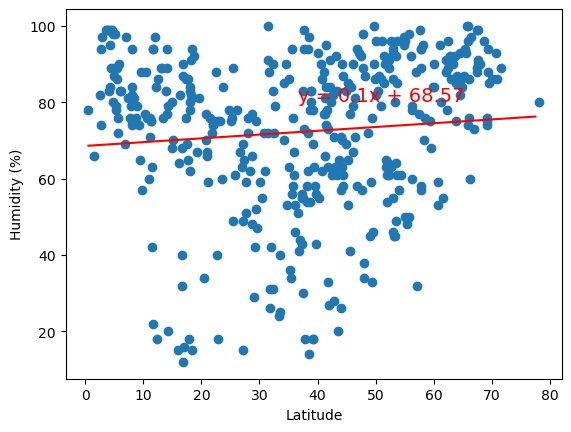

(None, None)

In [163]:
# Northern Hemisphere
regression(northern_hemi_df['Latitude'],northern_hemi_df['Humidity (%)'])

The r-value is 0.08393874229451671


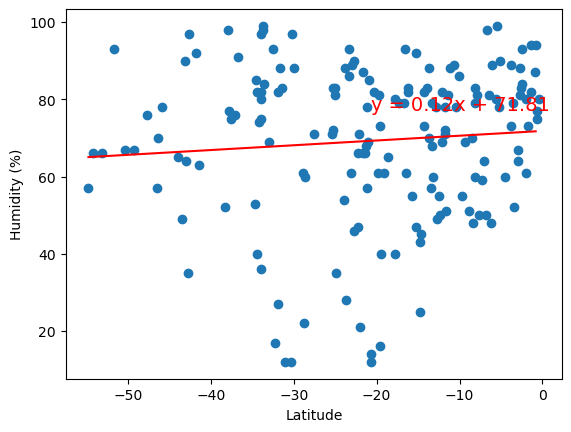

(None, None)

In [164]:
# Southern Hemisphere
regression(southern_hemi_df['Latitude'],southern_hemi_df['Humidity (%)'])

**Discussion about the linear relationship:** There is almost no correlation at all between the absolute value of latitiude (distance from the equator) and humidity. This makes sense, as humidity is more based on proximity to water and land conditions than distance from the equator.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.0900823791209183


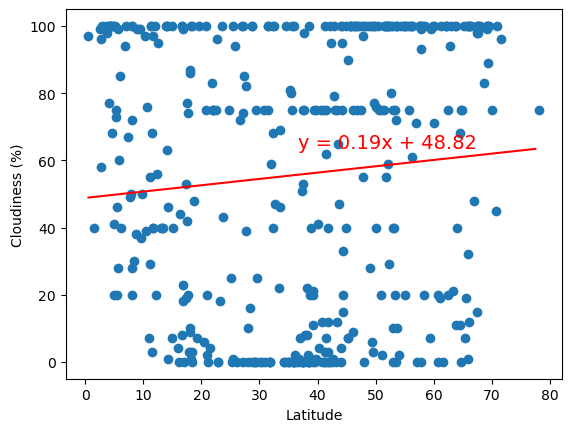

(None, None)

In [165]:
# Northern Hemisphere
regression(northern_hemi_df['Latitude'],northern_hemi_df['Cloudiness (%)'])

The r-value is 0.23978588008182458


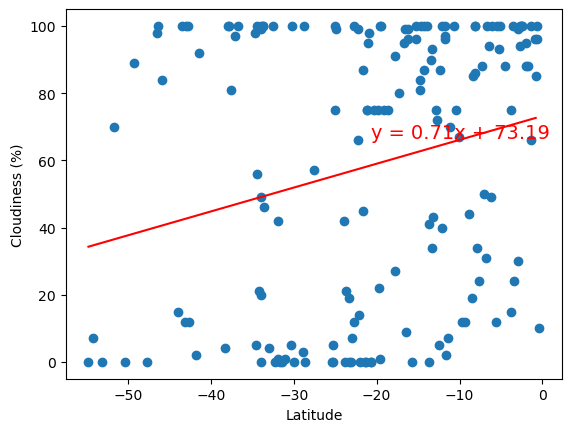

(None, None)

In [166]:
# Southern Hemisphere
regression(southern_hemi_df['Latitude'],southern_hemi_df['Cloudiness (%)'])

**Discussion about the linear relationship:** There is almost no correlation between latitude in either direction and cloudiness. The slope is higher than with humidity, as is the r-value, but the r-value is far too low for there to be any kind of relationship betwixt the two. Additionally, the slopes appear to be going in opposite directions, which wouldn't make sense. If there is a correlation, they should have opposite slopes as you head away from zero latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.15019659619527392


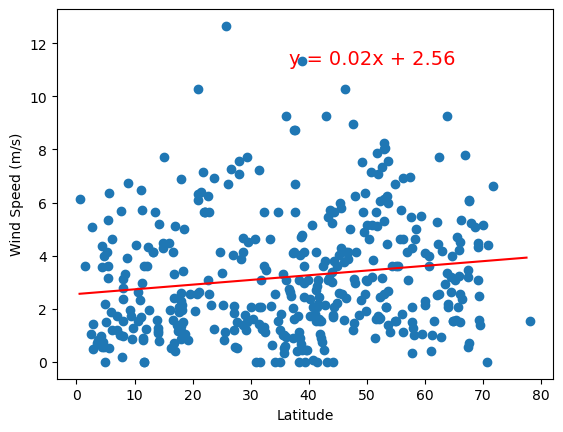

(None, None)

In [167]:
# Northern Hemisphere
regression(northern_hemi_df['Latitude'],northern_hemi_df['Wind Speed (m/s)'])

The r-value is -0.2696386246461527


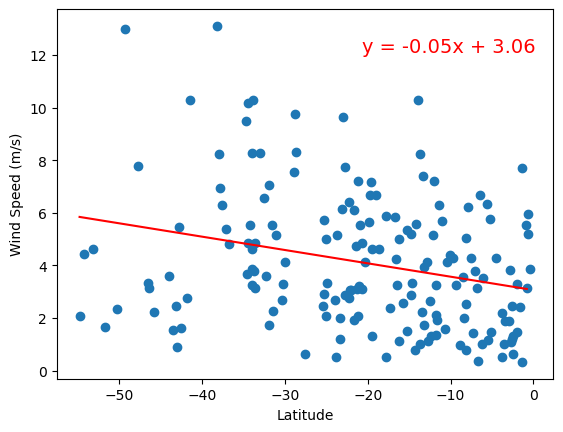

(None, None)

In [168]:
# Southern Hemisphere
regression(southern_hemi_df['Latitude'],southern_hemi_df['Wind Speed (m/s)'])

**Discussion about the linear relationship:** There is a very weak correlation showing that wind speeds tend to increase the further one gets from the equator. The r-values are higher than the previous two correlations, but still very low.